# <center> <span style="color:lightblue">**Ensemble**</span>


<center><img src="Ensemble.excalidraw.png">

## Voting Technique of Ensemble

- Base models are different algorithms
- Base models are trained with different parameters
  - e.g like : Linear Regression, SVM , Decision Tree
- all this models are trained with the same data 
- for Classification we use majority rule or highest common outcome from all the models
- in case of regression model we use Mean of all the model output

## Bagging technique of Ensemble

- Bootstrap Aggregation (Bagging)
- Base Model is Random Forest or SVM (Suport Vector machine)
- this model is trained on different sets of data at random from same dataset
- for Classification we use majority rule or highest common outcome from all the models
- in case of regression model we use Mean of all the model output

## Stacking technique of Ensemble

- this technique is similor to Voting technique with different models trained from the dataset only defference is another model like KNN is used to predict the result
- this KNN model is trained on the output of the previous models like Linear Regression,SVM,Decision Tree and a result is predicted from this 
- each model like Linear Regression,SVM,Decision Tree is given a weightage and the result is predicted using the weightage of each model
- since this models are stacked it is called stacking technique

## Boosting Ensemble Technique

- this technique uses only one model similor to Bagging
- this technique has three different models 
  - Ada Boosting
  - Gradient Boosting
  - XG Boosting (Extrene Gradient Boosting)
- 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

## <center><span style="color:lightpink">**Voting Boosting**</span>

## <center><span style="color:lightpink">**Ada Boosting**</span>

In [2]:
df=pd.DataFrame()
df["X1"]=[1,2,3,4,5,6,6,7,9,9]
df["X2"]=[5,3,6,8,1,9,5,8,9,2]
df["label"]=[1,1,0,1,0,1,0,1,0,0]
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


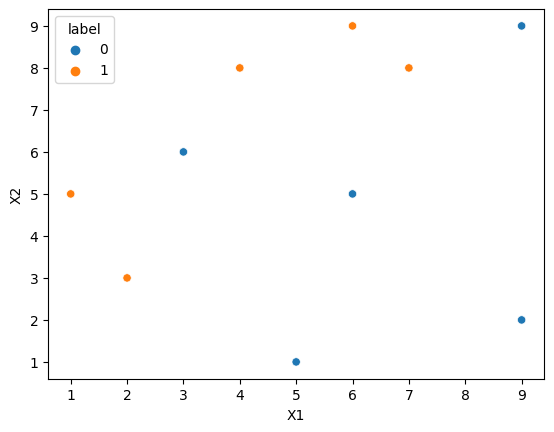

In [4]:
sns.scatterplot(x=df["X1"],y=df["X2"],hue=df["label"])
plt.show()

In [6]:
# add weights to the model

df["weights"]=1/df.shape[0]
df.head(3)

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1


In [9]:
# add decision stumps (max depth = 1)
dt1=DecisionTreeClassifier(max_depth=1)

X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [10]:
# Step 2 train
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

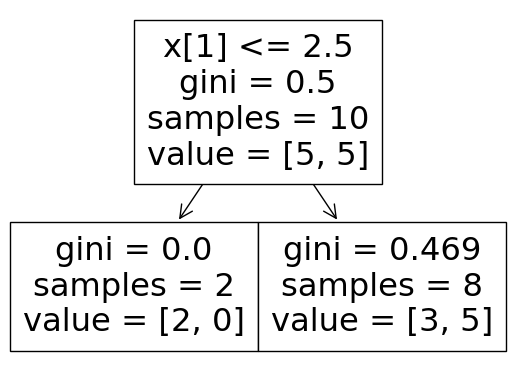

In [11]:
plot_tree(dt1)

<AxesSubplot: >

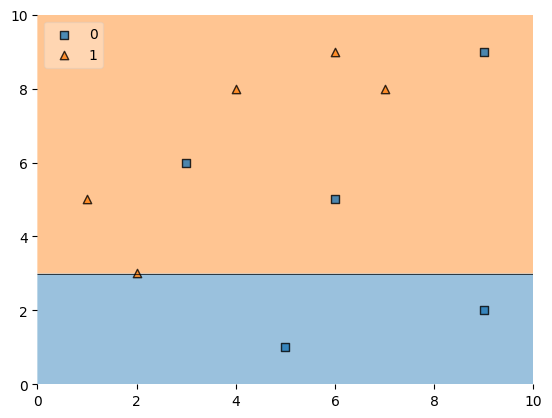

In [12]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [13]:
df["y_pred"]=dt1.predict(X)
df.head(3)

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1


In [14]:
def calculate_model_weights(error):
    return 0.5 * np.log((1-error)/(error))

In [15]:
# Step 3 calculate model weights
alpha1 = calculate_model_weights(0.3)
alpha1

0.42364893019360184

In [16]:
# Step 4 update weights

def update_row_weights(row,alpha=0.423):
    if row["label"] ==  row["y_pred"]:
        return row["weights"] * np.exp(-alpha)
    else:
        return row["weights"] * np.exp(alpha)

In [17]:
df["updated_weights"]=df.apply(update_row_weights,axis=1)
df.head(3)

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653


In [18]:
df["updated_weights"].sum()

0.9165153319682015

In [19]:
# Normalize
df["normalized_weights"]=df["updated_weights"]/df["updated_weights"].sum()
df.head(3)

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559


In [20]:
df["normalized_weights"].sum()

1.0

In [22]:
df["cumsum_upper"]=np.cumsum(df["normalized_weights"])

In [23]:
df["cumsum_lower"]=df["cumsum_upper"]-df["normalized_weights"]
df.head(5)

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983


In [24]:
def create_new_dataset(df):
    indices=[]
    for i in range(df.shape[0]):
        a= np.random.random()
        for index,row in df.iterrows():
            if row["cumsum_upper"]>a and a> row["cumsum_lower"]:
                indices.append(index)
    return indices

In [25]:
# upSampling
index_values=create_new_dataset(df)
index_values

[2, 5, 1, 8, 3, 1, 7, 3, 1, 9]

In [26]:
second_df=df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
2,3,6,0,0.1
5,6,9,1,0.1
1,2,3,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
1,2,3,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
1,2,3,1,0.1
9,9,2,0,0.1


In [27]:
dt2=DecisionTreeClassifier(max_depth=1)

In [28]:
X1=second_df.iloc[:,0:2].values
y1=second_df.iloc[:,2].values

In [29]:
dt2.fit(X1,y1)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

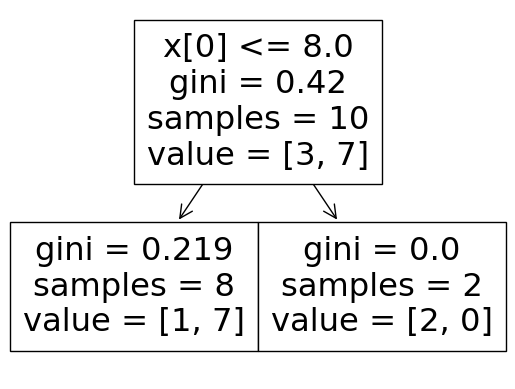

In [30]:
plot_tree(dt2)

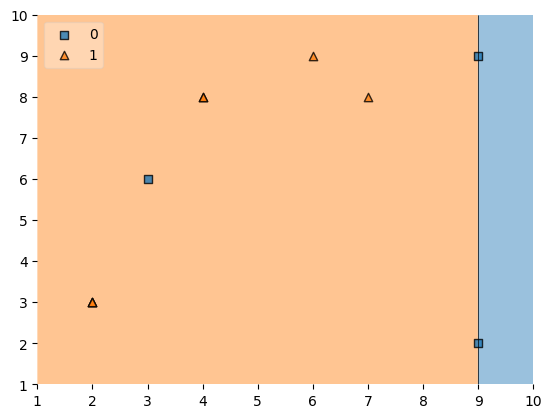

In [34]:
plot_decision_regions(X1,y1,clf=dt2,legend=2);

In [36]:
second_df["y_pred"]=dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,1
5,6,9,1,0.1,1
1,2,3,1,0.1,1
8,9,9,0,0.1,1
3,4,8,1,0.1,1
1,2,3,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
1,2,3,1,0.1,0
9,9,2,0,0.1,0


In [37]:
alpha2=calculate_model_weights(0.1)
alpha2

1.0986122886681098

In [38]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)
     

In [40]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df.head(3)


,X1,X2,label,weights,y_pred,updated_weights
2,3,6,0,0.1,1,0.297427
5,6,9,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622


In [41]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df.head(3)


,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
2,3,6,0,0.1,1,0.297427,0.263762
5,6,9,1,0.1,1,0.033622,0.029816
1,2,3,1,0.1,1,0.033622,0.029816


In [42]:
second_df['nomalized_weights'].sum()


1.0

In [43]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
2,3,6,0,0.1,1,0.263762,0.000000,0.263762
5,6,9,1,0.1,1,0.029816,0.263762,0.293579
1,2,3,1,0.1,1,0.029816,0.293579,0.323395
8,9,9,0,0.1,1,0.263762,0.323395,0.587157
3,4,8,1,0.1,1,0.029816,0.587157,0.616973
1,2,3,1,0.1,1,0.029816,0.616973,0.646789
7,7,8,1,0.1,1,0.029816,0.646789,0.676605
3,4,8,1,0.1,1,0.029816,0.676605,0.706421
1,2,3,1,0.1,0,0.263762,0.706421,0.970184
9,9,2,0,0.1,0,0.029816,0.970184,1.000000


In [45]:
index_values = create_new_dataset(second_df)
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df


,X1,X2,label,weights
1,2,3,1,0.1
5,6,9,1,0.1
1,2,3,1,0.1
1,2,3,1,0.1
1,2,3,1,0.1
1,2,3,1,0.1
1,2,3,1,0.1
5,6,9,1,0.1
3,4,8,1,0.1
1,2,3,1,0.1


In [46]:
dt3 = DecisionTreeClassifier(max_depth=1)

X2 = second_df.iloc[:,0:2].values
y2 = second_df.iloc[:,2].values

dt3.fit(X2,y2)

DecisionTreeClassifier(max_depth=1)

<AxesSubplot: >

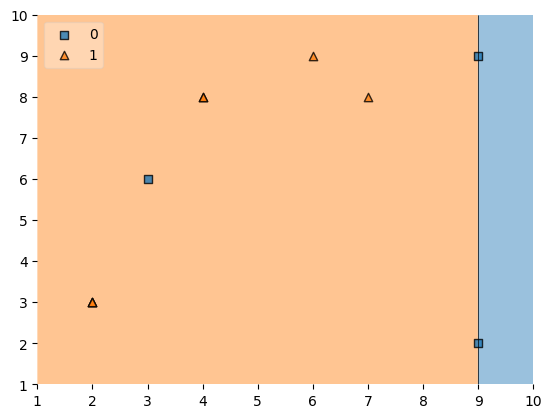

In [47]:
plot_decision_regions(X2, y2, clf=dt3, legend=2)
     

In [48]:
third_df['y_pred'] = dt3.predict(X)
third_df


,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
5,6,9,1,0.1,1
1,2,3,1,0.1,1
1,2,3,1,0.1,1
1,2,3,1,0.1,1
1,2,3,1,0.1,1
1,2,3,1,0.1,1
5,6,9,1,0.1,1
3,4,8,1,0.1,0
1,2,3,1,0.1,0


In [49]:
alpha3 = calculate_model_weights(0.7)
alpha3
     

-0.4236489301936017

In [50]:
print(alpha1,alpha2,alpha3)


0.42364893019360184 1.0986122886681098 -0.4236489301936017


# <span style="color:red">**Prediction**


In [51]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)
     

array([1], dtype=int64)

In [52]:
dt2.predict(query)


array([1], dtype=int64)

In [53]:
dt3.predict(query)


array([1], dtype=int64)

In [54]:
alpha1*1 + alpha2*(1) + alpha3*(1)


1.09861228866811

In [55]:
np.sign(1.09)


1.0

In [56]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)
     

array([1], dtype=int64)

In [57]:
dt2.predict(query)

array([0], dtype=int64)

In [58]:
dt3.predict(query)

array([0], dtype=int64)

In [59]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [60]:
np.sign(-0.25)


-1.0

## Using  SkLearn

## <center><span style="color:lightpink">**Gradient Boosting**</span>

In [3]:
# 
np.random.seed(42)
X=np.random.rand(100,1) - 0.5
y= 3*X[:,0]**2 + 0.05 * np.random.randn(100)

In [4]:
df=pd.DataFrame()
df["X"]=X.reshape(100)
df["y"]=y

In [5]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


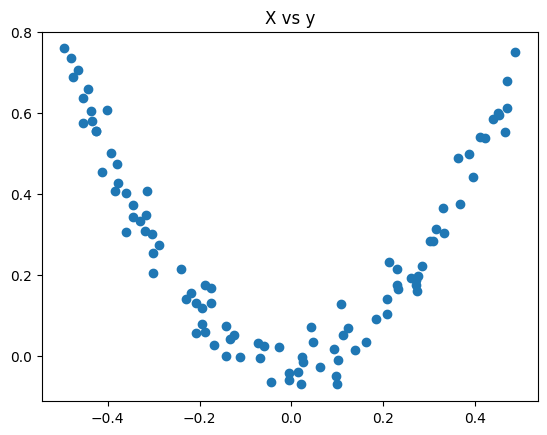

In [6]:
plt.scatter(df["X"],df["y"])
plt.title("X vs y")
plt.show()

In [8]:
# Strp 1
df["pred1"]=df["y"].mean()
df.head(3)

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458


In [10]:
df["res1"]=df["y"] - df["pred1"]
df.head(3)

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407


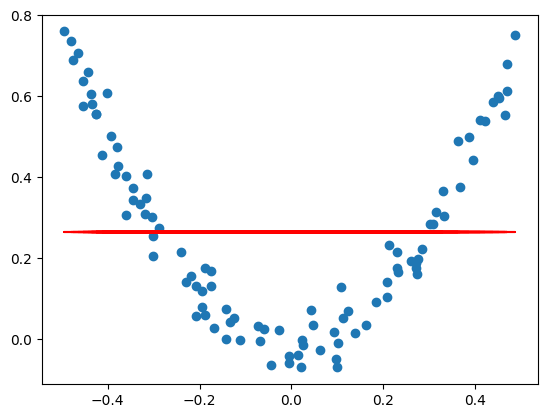

In [11]:
plt.scatter(df["X"],df["y"])
plt.plot(df["X"],df["pred1"],color="red")
plt.show()

In [13]:
tree1=DecisionTreeRegressor(max_leaf_nodes=8) # range for best results 8-32

In [14]:
tree1.fit(df["X"].values.reshape(100,1),df["res1"].values)

DecisionTreeRegressor(max_leaf_nodes=8)

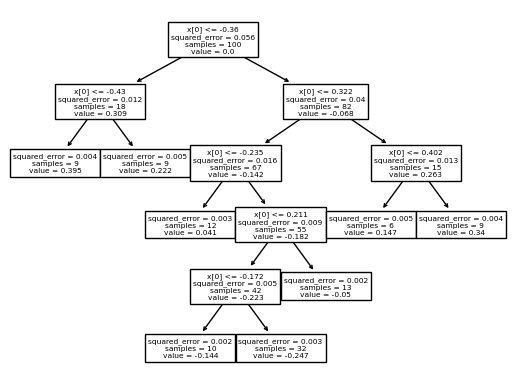

In [16]:
plot_tree(tree1)
plt.show()

In [17]:
# generate X_test set
X_test=np.linspace(-0.5,0.5,500)
y_pred= 0.265458 + tree1.predict(X_test.reshape(500,1))

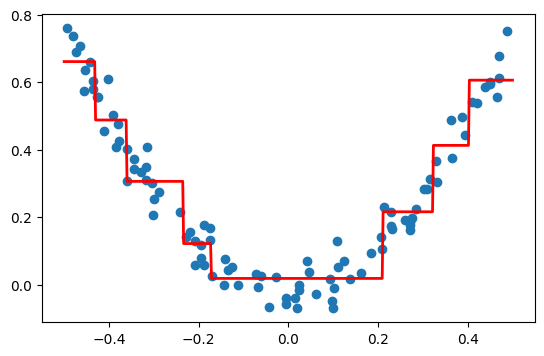

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color="red")
plt.scatter(df["X"],df["y"])


plt.show()

In [20]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

df.head(3)

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784


In [21]:
df['res2'] = df['y'] - df['pred2']
df.head(3)

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732


In [22]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [23]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [24]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

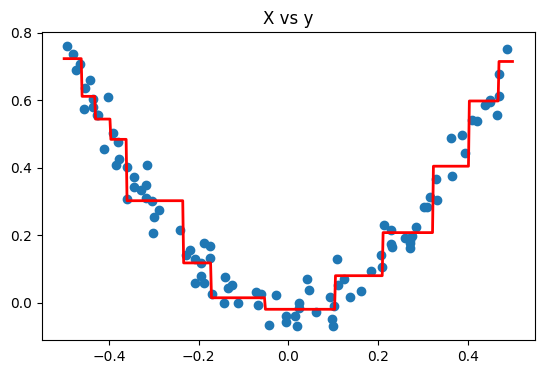

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

plt.show()

In [26]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


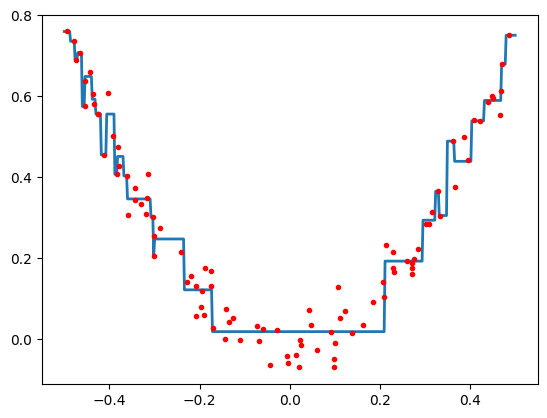

4


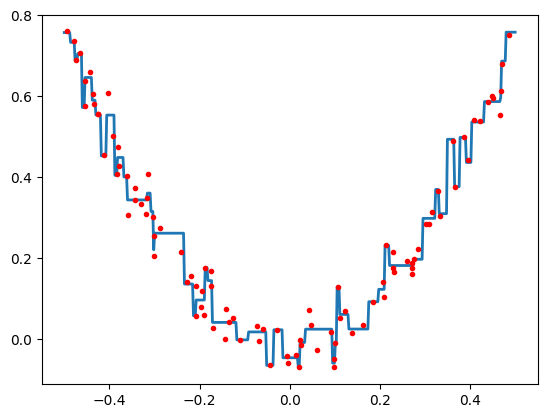

3


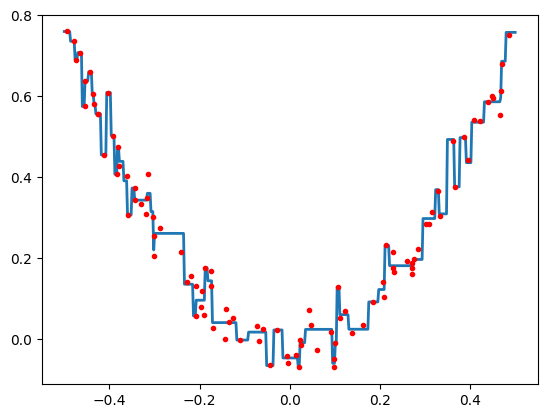

2


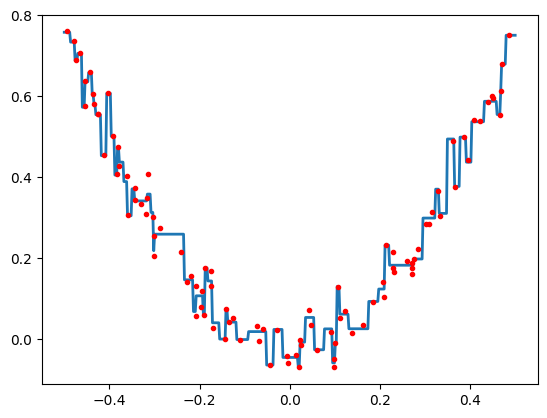

1


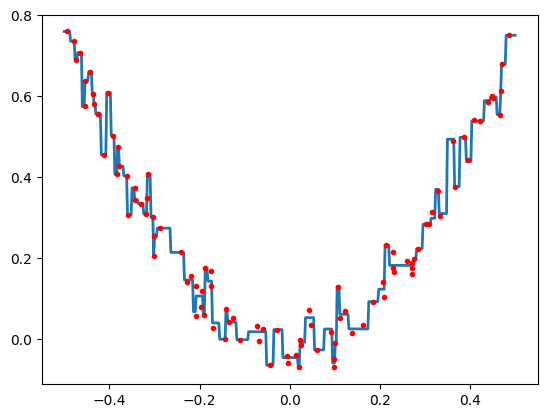

In [27]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)